In [1]:
import os

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


In [3]:

df = pd.read_csv('last_clean.csv',encoding="cp949")

In [4]:
df[['사고']]

,사고
0,1
1,1
2,1
3,0
4,1
...,...
28935,0
28936,0
28937,1
28938,1


In [5]:
y_data = df[['사고']]
len(y_data)

28940

In [6]:
x_data = df.loc[:, ['유의파고','파향','최대파주기','풍속','풍향']]
x_data = x_data.astype(np.float32)
len(x_data)

28940

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)


In [9]:
# encoder = OneHotEncoder()
# y_data_encoded = encoder.fit_transform(y_data).toarray()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=2021)



In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)



In [12]:
type(x_train)

numpy.ndarray

In [13]:
type(y_train)

pandas.core.frame.DataFrame

In [14]:
# y_train=y_train.astype(int)

In [15]:
type(x_train[0][0])

numpy.float32

In [16]:
import numpy
y_train=y_train.astype(numpy.int64)

In [17]:
x_train=x_train.reshape(x_train.shape[0],5,1)
x_val=x_val.reshape(x_val.shape[0],5,1)
x_test=x_test.reshape(x_test.shape[0],5,1)

In [18]:
from tensorflow.keras import optimizers
from keras.layers import LSTM 
from keras.layers import Dense 

model = Sequential() # Sequeatial Model 
model.add(LSTM(8))   
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc']) 


In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)
best=ModelCheckpoint('best_model',monitor='val_loss',mode='min',verbose=1)

history=model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size = 8,
    verbose=1,
    validation_data=(x_val, y_val), 
    callbacks=[early_stop,best]
#     callbacks=[best]
    
)

Epoch 1/200
2306/2316 [============================>.] - ETA: 0s - loss: 0.2377 - acc: 0.6438
Epoch 00001: saving model to best_model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.2376 - acc: 0.6438 - val_loss: 0.2204 - val_acc: 0.6625
Epoch 2/200
2294/2316 [============================>.] - ETA: 0s - loss: 0.2141 - acc: 0.6679
Epoch 00002: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.2140 - acc: 0.6681 - val_loss: 0.2174 - val_acc: 0.6705
Epoch 3/200
2308/2316 [============================>.] - ETA: 0s - loss: 0.2087 - acc: 0.6775
Epoch 00003: saving model to best_model
INFO:tensorf

Epoch 25/200
2315/2316 [============================>.] - ETA: 0s - loss: 0.1803 - acc: 0.7319
Epoch 00025: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 4ms/step - loss: 0.1803 - acc: 0.7319 - val_loss: 0.1816 - val_acc: 0.7238
Epoch 26/200
2310/2316 [============================>.] - ETA: 0s - loss: 0.1801 - acc: 0.7334
Epoch 00026: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.1801 - acc: 0.7335 - val_loss: 0.1818 - val_acc: 0.7327
Epoch 27/200
2293/2316 [============================>.] - ETA: 0s - loss: 0.1798 - acc: 0.7333
Epoch 00027: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 4ms/step - loss: 0.1798 - acc: 0.7331 - val_loss: 0.1813 - val_acc: 0.7314
Epoch 28/200
2294/2316 [============================>.] - ETA: 0s -

INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 7s 3ms/step - loss: 0.1756 - acc: 0.7421 - val_loss: 0.1769 - val_acc: 0.7407
Epoch 52/200
2316/2316 [==============================] - ETA: 0s - loss: 0.1755 - acc: 0.7412
Epoch 00052: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1755 - acc: 0.7412 - val_loss: 0.1778 - val_acc: 0.7361
Epoch 53/200
2304/2316 [============================>.] - ETA: 0s - loss: 0.1756 - acc: 0.7403
Epoch 00053: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1755 - acc: 0.7407 - val_loss: 0.1754 - val_acc: 0.7402
Epoch 54/200
2301/2316 [============================>.] - ETA: 0s - loss: 0.1752 - acc: 0.7423
Epoch 00054: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [===

Epoch 78/200
2300/2316 [============================>.] - ETA: 0s - loss: 0.1718 - acc: 0.7498
Epoch 00078: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1715 - acc: 0.7503 - val_loss: 0.1738 - val_acc: 0.7463
Epoch 79/200
2290/2316 [============================>.] - ETA: 0s - loss: 0.1712 - acc: 0.7498
Epoch 00079: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1714 - acc: 0.7497 - val_loss: 0.1729 - val_acc: 0.7493
Epoch 80/200
2308/2316 [============================>.] - ETA: 0s - loss: 0.1709 - acc: 0.7526
Epoch 00080: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.1710 - acc: 0.7523 - val_loss: 0.1713 - val_acc: 0.7528
Epoch 81/200
2308/2316 [============================>.] - ETA: 0s -

INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 4ms/step - loss: 0.1686 - acc: 0.7549 - val_loss: 0.1707 - val_acc: 0.7519
Epoch 105/200
2306/2316 [============================>.] - ETA: 0s - loss: 0.1688 - acc: 0.7551
Epoch 00105: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.1688 - acc: 0.7550 - val_loss: 0.1708 - val_acc: 0.7495
Epoch 106/200
2291/2316 [============================>.] - ETA: 0s - loss: 0.1685 - acc: 0.7563
Epoch 00106: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 9s 4ms/step - loss: 0.1684 - acc: 0.7567 - val_loss: 0.1707 - val_acc: 0.7566
Epoch 107/200
2316/2316 [==============================] - ETA: 0s - loss: 0.1686 - acc: 0.7558
Epoch 00107: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [

Epoch 131/200
2313/2316 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.7564
Epoch 00131: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 4ms/step - loss: 0.1672 - acc: 0.7565 - val_loss: 0.1723 - val_acc: 0.7508
Epoch 132/200
2301/2316 [============================>.] - ETA: 0s - loss: 0.1671 - acc: 0.7566
Epoch 00132: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1672 - acc: 0.7563 - val_loss: 0.1703 - val_acc: 0.7512
Epoch 133/200
2297/2316 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.7560
Epoch 00133: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 8s 3ms/step - loss: 0.1671 - acc: 0.7563 - val_loss: 0.1696 - val_acc: 0.7534
Epoch 134/200
2301/2316 [============================>.] - ETA: 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model')
print('\n테스트 정확도 : %.4f'%(loaded_model.evaluate(x_test,y_test)[1]))

181/181 [==============================] - 0s 1ms/step - loss: 0.1729 - acc: 0.7490

테스트 정확도 : 0.7490


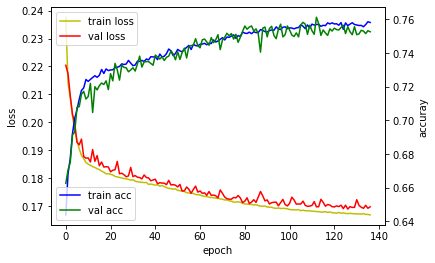

In [22]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()